# Classification de Pokemon

## Le projet:

* Il s'agit de classifier des images de Pokemon (Raichu ou Pikachu). 

* La base de données provient du GitHub de diewland : https://github.com/diewland/pika-dataset-v3

* 509 images de Pikachu, 514 de Raichu

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from pathlib import Path
from torchvision.transforms import transforms
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from PIL import Image
import pickle

In [ ]:
batch_size = 16
img_height = 180
img_width = 180

Séparation de la base de données en deux; d'un côté les données train (80%) sur lesquelles on va entrainer le modèle et de l'autre les données test (20%) pour tester le modèle entrainé.

In [ ]:
data_dir = Path('/content/drive/MyDrive/pokemon')

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1023 files belonging to 2 classes.
Using 819 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1023 files belonging to 2 classes.
Using 204 files for validation.


On retrouve les deux pokemon Pikachu et Raichu.

In [ ]:
class_names = train_ds.class_names
print(class_names)

['pikachu', 'raichu']


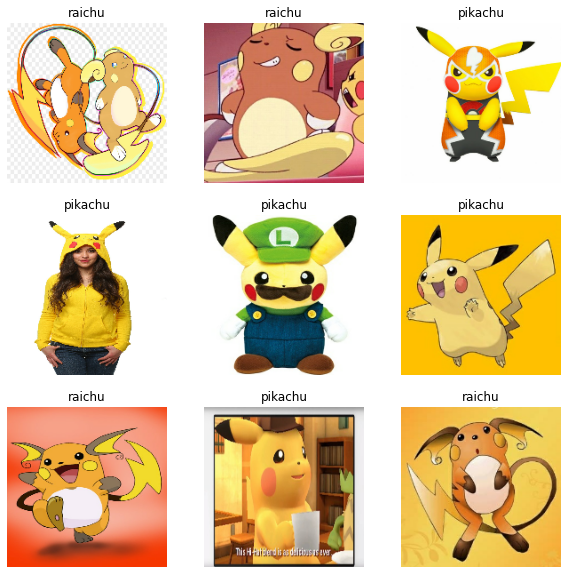

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 5

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  Dropout(0.4),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,validation_data=val_ds,epochs=20)

Epoch 1/20
52/52 [==============================] - 2s 27ms/step - loss: 0.8606 - accuracy: 0.5177 - val_loss: 0.7308 - val_accuracy: 0.4608
Epoch 2/20
52/52 [==============================] - 1s 22ms/step - loss: 0.6688 - accuracy: 0.6227 - val_loss: 0.6340 - val_accuracy: 0.6569
Epoch 3/20
52/52 [==============================] - 1s 22ms/step - loss: 0.6272 - accuracy: 0.6838 - val_loss: 0.5519 - val_accuracy: 0.6912
Epoch 4/20
52/52 [==============================] - 1s 22ms/step - loss: 0.5594 - accuracy: 0.7192 - val_loss: 0.5491 - val_accuracy: 0.7647
Epoch 5/20
52/52 [==============================] - 1s 22ms/step - loss: 0.5390 - accuracy: 0.7570 - val_loss: 0.6025 - val_accuracy: 0.6814
Epoch 6/20
52/52 [==============================] - 1s 22ms/step - loss: 0.5342 - accuracy: 0.7546 - val_loss: 0.5572 - val_accuracy: 0.7059
Epoch 7/20
52/52 [==============================] - 1s 22ms/step - loss: 0.4890 - accuracy: 0.7827 - val_loss: 0.4295 - val_accuracy: 0.8039
Epoch 8/20
52

### Commentaires

Accuracy du modèle sur les données d'entrainement: 86,94%.

Accuracy du modèle sur les données test: 83,33%.

Autrement dit, le pourcentage d'erreur du modèle est de 17%.

## Phase de test du modèle avec de nouvelles images

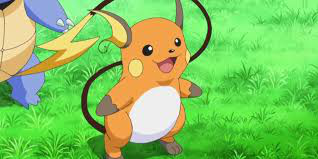

In [2]:
img = Image.open('/content/rai3.jpg')
img

In [ ]:
img_ = tf.keras.utils.load_img(
    "/content/rai3.jpg", color_mode='rgb', target_size=(img_height,img_width,3))
img_ = tf.keras.utils.img_to_array(img_)
img_ = img_.reshape(1,180,180,3)

In [ ]:
class_names[model.predict(img_).argmax()]

'raichu'

### Enregistrement du modèle
_____________________________________________________________________________________________


In [ ]:
Pkl_Filename = "Pokemon_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy']), file)


In [ ]:
#Pour load :
# with open(Pkl_Filename, 'rb') as file:  
#     Pickled_LR_Model = pickle.load(file)

# Pickled_LR_Model